# Plotting AC-SAF data

The script introduces you to opening - browsing the content and making simple plots of an AC-SAF dataset. In our case the NO$_2$ from GOME. We make use of xarray that is a much useful package to deal with multidimensional gridded datasets. Before import the necessary packages. Be sure to have them installed. If not - conda install <package_name> 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc

We'll start by opening up some GOME2 NO$_{2}$ data onboard the METOPs satellites and showing an overview of the dataset. The output will be in an array (no2) that contains the data, the coordinates and the attributes.
The dataset is available from the open Atmospheric Composition SAF database https://acsaf.org/offline_access.html

In [75]:
#This is a way to open the dataset and gather the variable ...

no2_ACSAF=nc.Dataset("../AC-SAF_NO2/GOME_NO2_Global_201305_METOPB_DLR_v1.nc", 'r')
no2=no2_ACSAF.groups['PRODUCT'].variables['NO2total'][:][:,:]
longitude=no2_ACSAF.variables['longitude']
latitude=no2_ACSAF.variables['latitude']

print(no2)
#More elegant to use xarray - should specify the group now
#no2_ACSAF = xr.open_dataset("../AC-SAF_NO2/GOME_NO2_Global_201305_METOPB_DLR_v1.nc",group='PRODUCT')
#no2=no2_ACSAF.NO2total
#longitude=no2_ACSAF.longitude
#latitude=no2_ACSAF.latitude

[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [5580842386587648.0 5577412855201792.0 5575315837419520.0 ...
  5579113125380096.0 5582341867044864.0 5582508833898496.0]
 [5535035486633984.0 5537934589558784.0 5542051852582912.0 ...
  5539156507754496.0 5538653459709952.0 5537274775207936.0]
 [5678572219924480.0 5671914483744768.0 5664598543826944.0 ...
  5647255465885696.0 5664821345255424.0 5670813361504256.0]]


The structure is then quite simple. Now let's turn on basic plotting.

## Extracting and plotting point data
First, let's plot the NO$_{2}$ column over a selected site for the whole timeseries.

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

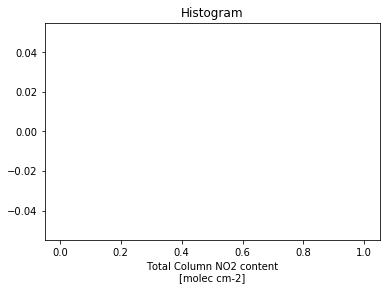

In [49]:
# Find the closest point

first_point = no2_ACSAF.NO2total.isel(latitude=50, longitude=8)

# Then plot the timeseries

first_point.plot()

NO$_{2}$ concentration has a maximum between 13 and 17 of March.

We can also plot the time series for coordinates different than the ones multiple points at the same time. Here we plot NO$_{2}$ over ECMWF in Reading and EUMETSAT in Darmstadt.

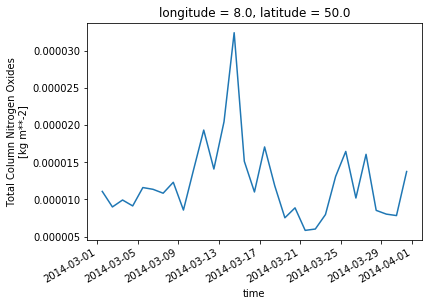

In [22]:
no2.sel(latitude=49.1, longitude=8.43, method="nearest").plot.line(x="time")

#no2.sel(latitude=50, longitude=[8,1], method="nearest").plot.line(x="time")

## Histograms
We can also plot a histogram of the entire dataset. In order to have sensible-looking bins, we plot the logarithm of the $NO_{2}$.

(array([8.26000e+02, 2.53070e+04, 3.20292e+05, 1.42497e+05, 1.48280e+04,
        3.00100e+03, 7.53000e+02, 2.26000e+02, 4.50000e+01, 5.00000e+00]),
 array([-14.359894 , -13.8184805, -13.277067 , -12.735655 , -12.194242 ,
        -11.652828 , -11.111415 , -10.570002 , -10.028589 ,  -9.487176 ,
         -8.945763 ], dtype=float32),
 <a list of 10 Patch objects>)

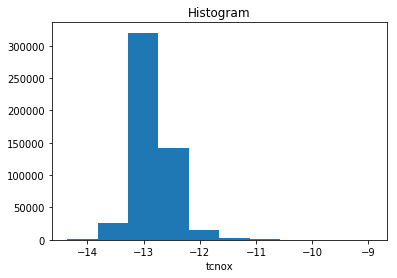

In [7]:
np.log(no2).plot()

## Maps
For a first glance, we plot a single time slice to see what we can see.

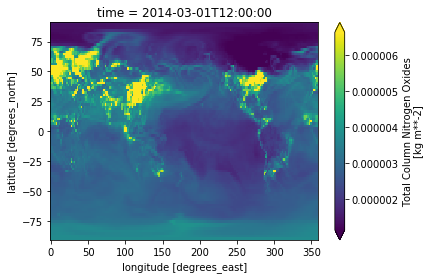

In [10]:
# Using geophysical units. `robust` disregards outliers for colour map creation.
no2.isel(time=0).plot(robust=True)

This is fine for getting a first glance, but we can reproject this onto a globe or any other coordinate system we like.

AttributeError: 'GeoAxesSubplot' object has no attribute '_hold'

/tcenas/home/ffierli/anaconda3/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


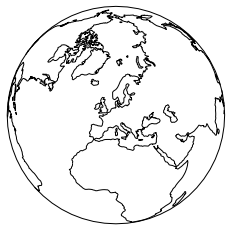

In [9]:
# Centered over Darmstadt
ax = plt.axes(projection=ccrs.Orthographic(8.7, 49.9))
ax.coastlines()
# Use last time step in array.
p = no2.isel(time=-1).plot(transform=ccrs.PlateCarree(), robust=True)